<a href="https://colab.research.google.com/github/Jyoti-Sama/weather-prediction-model/blob/main/final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import cv2 as cv
import random
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, InputLayer, concatenate, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Reshape, Dropout, Activation, Permute
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model as plot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=False)

Mounted at /content/drive


In [ ]:
dataset_folder = '/content/drive/MyDrive/colab/Interview dataset-Weather Prediction'

train_img_dir = dataset_folder + '/Train'
test_img_dir = dataset_folder + '/Test'

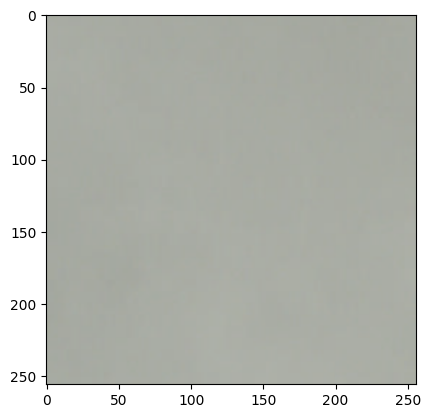

In [ ]:
img = cv.imread(test_img_dir + '/cloudy/train_39863.jpg')
img_cvt=cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
def plot_model(model):
    plt.figure(figsize=(10, 6))
    layers = model.layers
    layer_names = [layer.name for layer in layers]
    for i, layer in enumerate(layers):
        if hasattr(layer, 'get_weights'):
            weights = layer.get_weights()
            if len(weights) > 0:
                plt.scatter(i, 0, c='r')
                plt.text(i, 0, layer_names[i], fontsize=12, ha='center', va='bottom')
            else:
                plt.scatter(i, 0, c='b')
                plt.text(i, 0, layer_names[i], fontsize=12, ha='center', va='top')
        else:
            plt.scatter(i, 0, c='g')
            plt.text(i, 0, layer_names[i], fontsize=12, ha='center', va='top')

    plt.xticks(range(len(layers)), layer_names, rotation=90)
    plt.yticks([])
    plt.xlabel('Layer Index')
    plt.title('Model Architecture')
    plt.show()

# plot_model(model)


In [ ]:
batch_size = 20
img_size = 64 #height & width same

#
image_generator = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,  # Normalize pixel values between 0 and 1
)

#train
train_data_gen = image_generator.flow_from_directory(
    directory=train_img_dir,
    subset='training',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# validation
val_data_gen = image_generator.flow_from_directory(
    directory=train_img_dir,
    subset='validation',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

#test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_img_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

class_names = list(test_generator.class_indices.keys())
print("Class Name Order:")
print(class_names)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Class Name Order:
['cloudy', 'desert', 'green_area', 'water']


In [ ]:
number_of_classes = 4

In [6]:
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# # Freeze the layers up to a specific one
# for layer in base_model.layers[:15]:
#     layer.trainable = False

# # Create a new model and add the pre-trained base model as a layer
# model = Sequential()
# model.add(base_model)

# # Add additional layers on top of the pre-trained base model
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(number_of_classes, activation='softmax'))

# # compilation of model
# model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# # summary of model
# model.summary()


In [5]:
# plot_model(model)

In [4]:
# history = model.fit(
#       train_data_gen,
#       validation_data = val_data_gen,
#       steps_per_epoch = train_data_gen.samples//batch_size,
#       epochs = 20,
#       validation_steps = val_data_gen.samples//batch_size,
#       verbose = 1,
# )

In [3]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epochs')
# plt.legend(['train','test'])
# plt.show()

In [2]:
# hist_eval = model.evaluate(
#     test_generator,
#     verbose = 1,
# )
# print(hist_eval)

In [1]:
# model.save("/content/drive/MyDrive/colab/Model_no_1")

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze the pre-trained layers to prevent them from being trained again
for layer in base_model.layers:
    layer.trainable = False

# Create a new model and add the pre-trained base model as a layer
model = Sequential()
model.add(base_model)

# Add additional layers on top of the pre-trained base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# compilation of model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 15,240,260
Trainable params: 525,572
Non-trainable params: 14,714,688
_________________________________________________________________


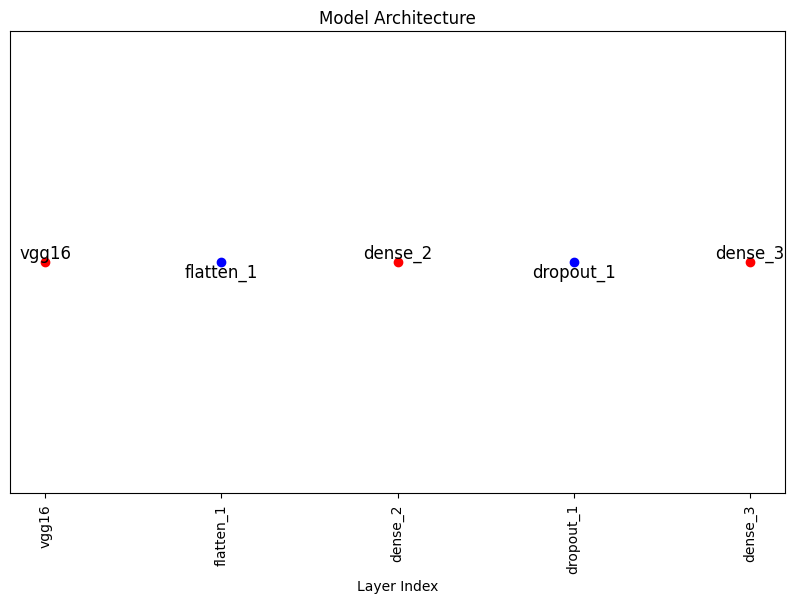

In [ ]:
plot_model(model)

In [ ]:
epochs = 20  # Number of training epochs
steps_per_epoch = train_data_gen.n // train_data_gen.batch_size
validation_steps = val_data_gen.n // val_data_gen.batch_size

history = model.fit(
    train_data_gen,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data_gen,
    validation_steps=validation_steps
)

Epoch 1/20
80/80 [==============================] - 253s 3s/step - loss: 0.7376 - accuracy: 0.7312 - val_loss: 0.3286 - val_accuracy: 0.9500
Epoch 2/20
80/80 [==============================] - 5s 65ms/step - loss: 0.3014 - accuracy: 0.9169 - val_loss: 0.2004 - val_accuracy: 0.9550
Epoch 3/20
80/80 [==============================] - 6s 81ms/step - loss: 0.2171 - accuracy: 0.9306 - val_loss: 0.1483 - val_accuracy: 0.9625
Epoch 4/20
80/80 [==============================] - 5s 60ms/step - loss: 0.1798 - accuracy: 0.9413 - val_loss: 0.1210 - val_accuracy: 0.9625
Epoch 5/20
80/80 [==============================] - 6s 69ms/step - loss: 0.1425 - accuracy: 0.9556 - val_loss: 0.1117 - val_accuracy: 0.9675
Epoch 6/20
80/80 [==============================] - 5s 59ms/step - loss: 0.1565 - accuracy: 0.9475 - val_loss: 0.1114 - val_accuracy: 0.9625
Epoch 7/20
80/80 [==============================] - 5s 62ms/step - loss: 0.1344 - accuracy: 0.9569 - val_loss: 0.1297 - val_accuracy: 0.9650
Epoch 8/20
80

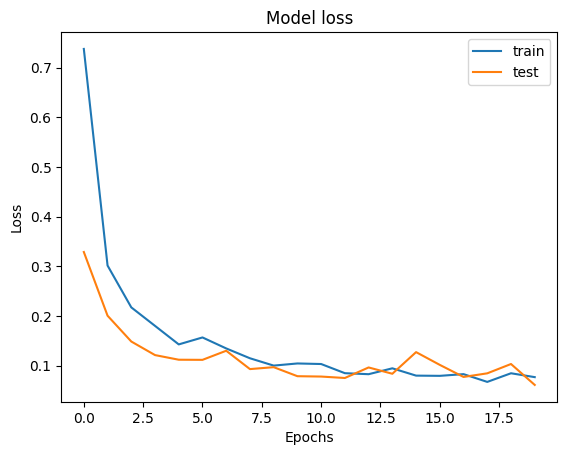

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

In [ ]:
hist_eval = model.evaluate(
    test_generator,
    verbose = 1,
)
print(hist_eval)

4/4 [==============================] - 17s 6s/step - loss: 1.7903 - accuracy: 0.7000
[1.7903133630752563, 0.699999988079071]


In [ ]:
model.save("/content/drive/MyDrive/colab/Model_no_2")

In [ ]:
def NNmodel():
    model = tf.keras.models.Sequential([
        # CONV1
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        # CONV2
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        # CONV3
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        # CONV4
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        Conv2D(512, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(2, 2),
        # Dropout(0.5),
        Flatten(),
        Dense(1024, activation='relu'),
        Dense(number_of_classes, activation='softmax')
    ])
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
    return model

In [ ]:
custom_model = NNmodel()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                  

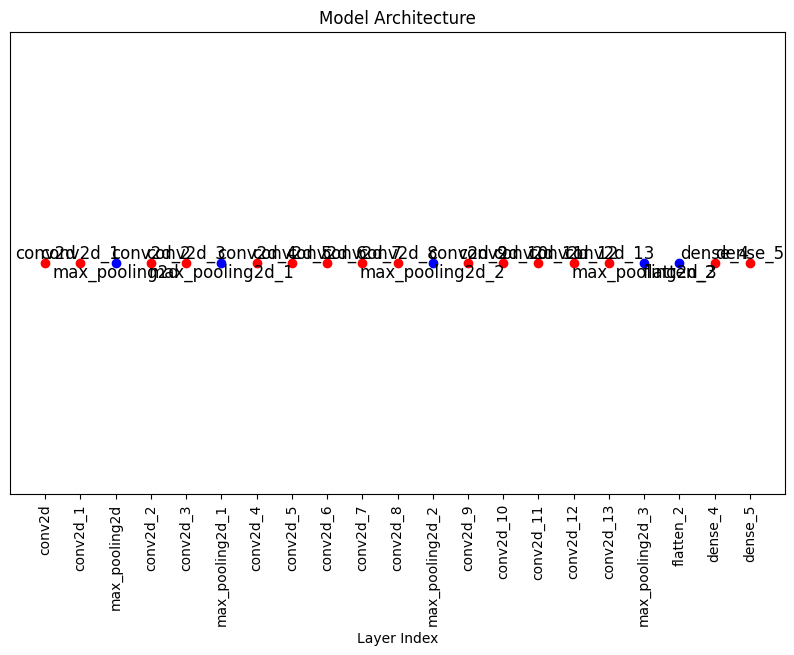

In [ ]:
plot_model(custom_model)

In [ ]:
epochs = 20  # Number of training epochs
steps_per_epoch = train_data_gen.n // train_data_gen.batch_size
validation_steps = val_data_gen.n // val_data_gen.batch_size

history = custom_model.fit(
    train_data_gen,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data_gen,
    validation_steps=validation_steps
)

Epoch 1/20
80/80 [==============================] - 12s 70ms/step - loss: 1.3965 - accuracy: 0.2438 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/20
80/80 [==============================] - 6s 76ms/step - loss: 1.3868 - accuracy: 0.2450 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/20
80/80 [==============================] - 5s 64ms/step - loss: 1.3867 - accuracy: 0.2412 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/20
80/80 [==============================] - 6s 76ms/step - loss: 1.3864 - accuracy: 0.2356 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/20
80/80 [==============================] - 6s 72ms/step - loss: 1.3864 - accuracy: 0.2450 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/20
80/80 [==============================] - 5s 66ms/step - loss: 1.3864 - accuracy: 0.2412 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/20
80/80 [==============================] - 5s 63ms/step - loss: 1.3864 - accuracy: 0.2369 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 8/20
8

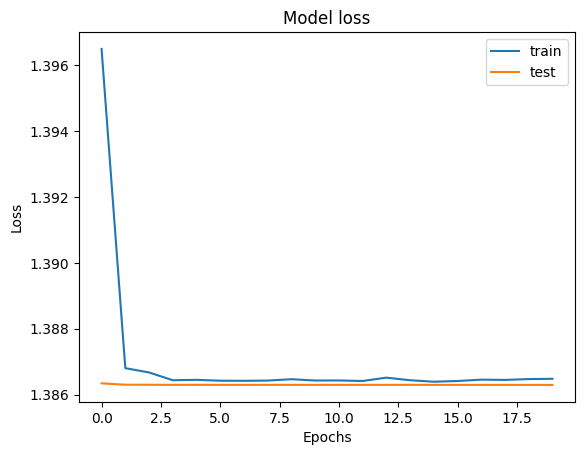

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

In [ ]:
hist_eval = custom_model.evaluate(
    test_generator,
    verbose = 1,
)
print(hist_eval)

4/4 [==============================] - 1s 132ms/step - loss: 1.3863 - accuracy: 0.2500
[1.3862947225570679, 0.25]


In [ ]:
custom_model.save("/content/drive/MyDrive/colab/Model_no_3")